<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Избавимся-от-выбросов" data-toc-modified-id="Избавимся-от-выбросов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Избавимся от выбросов</a></span></li><li><span><a href="#Факторы-влияния" data-toc-modified-id="Факторы-влияния-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Факторы влияния</a></span></li><li><span><a href="#Населенные-пункты" data-toc-modified-id="Населенные-пункты-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Населенные пункты</a></span></li><li><span><a href="#Расстояние-до-центра" data-toc-modified-id="Расстояние-до-центра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расстояние до центра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>


# Определение перспективного тарифа для телеком-компании

Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
Примечание:

##  Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv',index_col=0)
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

Прочитаем таблицы и сохраним в переменные 

In [3]:
df_calls.head(20)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Посмотрим инфо пропусков нет
1. id — уникальный номер звонка
2. call_date — дата звонка
3. duration — длительность звонка в минутах
4. user_id — идентификатор пользователя, сделавшего звонок

In [5]:
df_internet.head(10)


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Пропусков нет в столбце  Unnamed: 0 - можно переиминовать лишний пробел
1. id — уникальный номер сессии
2. mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
3. session_date — дата интернет-сессии
4. user_id — идентификатор пользователя

In [7]:
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
df_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


1. tariff_name — название тарифа
2. rub_monthly_fee — ежемесячная абонентская плата в рублях
3. minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
4. messages_included — количество сообщений в месяц, включённых в абонентскую плату
5. mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
6. rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
7. rub_per_message — стоимость отправки сообщения сверх тарифного пакета
8. rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [10]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Так есть пропуски в столбце churn_date но мы знаем что если значение пропущенно то тариф еще дейстовал значит заполнение пропусков не нужно 
1. user_id — уникальный идентификатор пользователя
2. first_name — имя пользователя
3. last_name — фамилия пользователя
4. age — возраст пользователя (годы)
5. reg_date — дата подключения тарифа (день, месяц, год)
6. churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
7. city — город проживания пользователя
8. tariff — название тарифного плана

Вывод:
Пропущенных значений которые нужно заменить в данных нет, нужно первести данные в нужные форматы минуты и гигабайты округлить в большую сторону, а даты перевест в datatime

### Предобработка df_calls

In [12]:
df_calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [13]:
df_calls.query('duration == 0')['duration'].count()
#Посмотрим сколько пропущенных звонков 

39613

In [14]:
# Функция замены типа данных для столбцов с датой:
def to_date(df, column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

In [15]:
# Функция округления в большую сторону и изменения типа до целочисленного
def round_int(df, column):
    df[column] = np.ceil(df[column])
    df[column].astype(int)
#def round_int(df, column):
    #df[column] = np.ceil(df[column])
    #df[column].astype(int)

In [16]:
to_date(df_calls,'call_date')

In [17]:
round_int(df_calls,'duration')

In [18]:
#df_calls['weekday'] = df_calls['call_date'].dt.weekday
df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')
#df_calls['year'] = df_calls['call_date'].dt.year
#Добавим день месяц год

<AxesSubplot:>

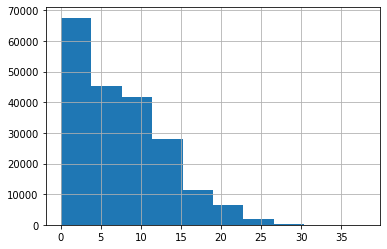

In [19]:
df_calls['duration'].hist()

Так у нас довольно много 0 звонков , по условиям это пропущенные звонки пока их не трогаем 

In [20]:
display(df_calls.head(20))
display(df_calls.info())
#проверим все ли правильно

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,2018-07-01
1,1000_1,2018-08-17,0.0,1000,2018-08-01
2,1000_2,2018-06-11,3.0,1000,2018-06-01
3,1000_3,2018-09-21,14.0,1000,2018-09-01
4,1000_4,2018-12-15,6.0,1000,2018-12-01
5,1000_5,2018-11-02,0.0,1000,2018-11-01
6,1000_6,2018-10-18,0.0,1000,2018-10-01
7,1000_7,2018-08-22,19.0,1000,2018-08-01
8,1000_8,2018-09-15,19.0,1000,2018-09-01
9,1000_9,2018-08-15,0.0,1000,2018-08-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 7.7+ MB


None

### Предобработка df_internet

In [21]:
to_date(df_internet,'session_date')
round_int(df_internet,'mb_used')
# Переведт в дататим и округлим значения

In [22]:
df_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000
5,1000_5,400.0,2018-10-02,1000
6,1000_6,541.0,2018-09-07,1000
7,1000_7,416.0,2018-07-11,1000
8,1000_8,506.0,2018-10-08,1000
9,1000_9,346.0,2018-09-03,1000


In [23]:
df_internet['gb_used'] = (df_internet['mb_used']/1024)
#Добавим гигабайты 

In [24]:
df_internet['month'] = df_internet['session_date'].astype('datetime64[M]')
#добавим месяц

In [25]:
#df_internet = df_internet.drop(columns=['Unnamed: 0'],axis = 1)
#удалим столбец 

In [26]:
df_internet.head(10)

,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,113.0,2018-11-25,1000,0.110352,2018-11-01
1,1000_1,1053.0,2018-09-07,1000,1.028320,2018-09-01
2,1000_2,1198.0,2018-06-25,1000,1.169922,2018-06-01
3,1000_3,551.0,2018-08-22,1000,0.538086,2018-08-01
4,1000_4,303.0,2018-09-24,1000,0.295898,2018-09-01
5,1000_5,400.0,2018-10-02,1000,0.390625,2018-10-01
6,1000_6,541.0,2018-09-07,1000,0.528320,2018-09-01
7,1000_7,416.0,2018-07-11,1000,0.406250,2018-07-01
8,1000_8,506.0,2018-10-08,1000,0.494141,2018-10-01
9,1000_9,346.0,2018-09-03,1000,0.337891,2018-09-01


<AxesSubplot:>

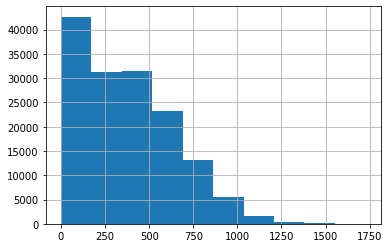

In [27]:
df_internet['mb_used'].hist()

<AxesSubplot:>

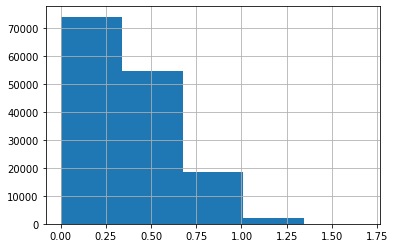

In [28]:
df_internet['gb_used'].hist(bins=5)

После окруuления у нас остались люде кто не использует интернет, это нормально удалять не будем 

### Предобработка df_messages

In [29]:
to_date(df_messages,'message_date')

In [30]:
df_messages['month'] = df_messages['message_date'].astype('datetime64[M]')
#добавим месяц

In [31]:
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


### Пердобработка df_users

In [32]:
#приведем даты в столбцах churn_date и reg_date к соответствующим форматам
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

#добавим информацию о тарифах в users в виде 0 и 1
def tariff_id(row):
    if row == 'smart':
        return 0
    elif row == 'ultra':
        return 1
df_users['tariff_id'] = df_users['tariff'].apply(tariff_id)

In [33]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,0
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,0
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart,0
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,0
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart,0


### Перобработка df_tariffs

In [34]:
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included']/1024
display(df_tariffs)

#переведём мегабайты в гигибайты и сохраним эти значения в столбце gb_per_month_included

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


### Посчитаем трафик и звонки

In [35]:
data_calls_pivot = df_calls.pivot_table(index=['user_id','month'],values=['duration'],aggfunc=('sum','count')).reset_index()
data_calls_pivot.columns = ['user_id', 'month', 'call_numbers', 'call_duration']
display(data_calls_pivot)

,user_id,month,call_numbers,call_duration
0,1000,2018-05-01,22,159.0
1,1000,2018-06-01,43,172.0
2,1000,2018-07-01,47,340.0
3,1000,2018-08-01,52,408.0
4,1000,2018-09-01,58,466.0
...,...,...,...,...
3169,1498,2018-10-01,41,247.0
3170,1499,2018-09-01,9,70.0
3171,1499,2018-10-01,68,449.0
3172,1499,2018-11-01,74,612.0


Кол-во звонков по месяцами их длинна

In [36]:
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


In [37]:
data_message_pivot = df_messages.pivot_table(index=['user_id','month'],values='id',aggfunc=('count')).reset_index()
data_message_pivot.columns = ['user_id', 'month', 'message_numbers']
display(data_message_pivot)

,user_id,month,message_numbers
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


Посчитали кол-во смс

In [38]:
df_internet.head(10)

,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,113.0,2018-11-25,1000,0.110352,2018-11-01
1,1000_1,1053.0,2018-09-07,1000,1.028320,2018-09-01
2,1000_2,1198.0,2018-06-25,1000,1.169922,2018-06-01
3,1000_3,551.0,2018-08-22,1000,0.538086,2018-08-01
4,1000_4,303.0,2018-09-24,1000,0.295898,2018-09-01
5,1000_5,400.0,2018-10-02,1000,0.390625,2018-10-01
6,1000_6,541.0,2018-09-07,1000,0.528320,2018-09-01
7,1000_7,416.0,2018-07-11,1000,0.406250,2018-07-01
8,1000_8,506.0,2018-10-08,1000,0.494141,2018-10-01
9,1000_9,346.0,2018-09-03,1000,0.337891,2018-09-01


In [39]:
df_internet_pivot = df_internet.pivot_table(index=['user_id','month'],values='gb_used',aggfunc='sum')
df_internet_pivot = df_internet_pivot['gb_used'].apply(np.ceil).reset_index()
df_internet_pivot.columns = ['user_id','month','gb_used']
df_internet_pivot= df_internet_pivot

Посчитаем объем трафика и округлим в большу сторону

In [40]:
df_internet_pivot.sort_values(by='gb_used', ascending=False).head(10)
#Топ 10 по использованному трафику 

,user_id,month,gb_used
799,1124,2018-10-01,49.0
1524,1240,2018-08-01,48.0
1622,1255,2018-07-01,45.0
1901,1300,2018-11-01,44.0
1528,1240,2018-12-01,43.0
1620,1255,2018-05-01,43.0
1164,1180,2018-10-01,43.0
383,1060,2018-12-01,43.0
159,1024,2018-11-01,43.0
2413,1380,2018-12-01,43.0


In [41]:
df_calls['user_id'].sort_values().unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

Посмотрим кол0во пользователей чтоб сверить после объеденнения, но не нашел метода покрасивее, если подскажите в коментах буду очень признателен )

In [42]:
data_message = data_calls_pivot.merge(data_message_pivot, on=['user_id','month'], how='outer')

Сведем таблицы с звонками и сообщениями 

In [43]:
data_internet = data_message.merge(df_internet_pivot, on=['user_id','month'],how='outer')

Сведем звонки, сообщения + интернет

In [44]:
data_internet['user_id'].sort_values().unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

Проверим на потери 

In [45]:
total_data = data_internet.merge(df_users,on='user_id', how='left')

In [46]:
total_data['user_id'].sort_values().unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

По user id никого не потеряли 

In [47]:
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})
display(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


Переименуем столбец для того чтобы объеденить таблицы 

In [48]:
total_data = total_data.merge(df_tariffs,on='tariff', how='outer')

Объеденим столбцы

In [49]:
total_data['user_id'].sort_values().unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

Проверим на потери 

In [50]:
total_data

,user_id,month,call_numbers,call_duration,message_numbers,gb_used,age,churn_date,city,first_name,...,tariff,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,2018-05-01,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,30.0
1,1000,2018-06-01,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,30.0
2,1000,2018-07-01,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,30.0
3,1000,2018-08-01,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,30.0
4,1000,2018-09-01,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08-01,NaN,NaN,17.0,11.0,35,NaT,Санкт-Петербург,Павел,...,smart,0,50,15360,500,550,200,3,3,15.0
3210,1489,2018-09-01,NaN,NaN,32.0,17.0,35,NaT,Санкт-Петербург,Павел,...,smart,0,50,15360,500,550,200,3,3,15.0
3211,1489,2018-10-01,NaN,NaN,21.0,20.0,35,NaT,Санкт-Петербург,Павел,...,smart,0,50,15360,500,550,200,3,3,15.0
3212,1489,2018-11-01,NaN,NaN,20.0,18.0,35,NaT,Санкт-Петербург,Павел,...,smart,0,50,15360,500,550,200,3,3,15.0


In [51]:
def total(row):
    #messages=row['message_date']
    #calls=row['duration']
    #internet=row['mb_used']
    #tariff=row['tariff']
    
    if row ['call_duration'] > row['minutes_included']:
        calls_sum = (row['call_duration']-row['minutes_included'])*row['rub_per_minute']
    else:
        calls_sum=0
    if row['message_numbers'] > row['messages_included']:
        message_id = (row['message_numbers']-row['messages_included'])*row['rub_per_message']
    else:
        message_id = 0
    if row['gb_used'] > row['gb_per_month_included']:
        internet_gb = (row['gb_used']-row['gb_per_month_included'])*row['rub_per_gb']
    else:
        internet_gb = 0
    total_cost = calls_sum + message_id + internet_gb + row['rub_monthly_fee']
    return total_cost

total_data['total_cost'] = total_data.apply(total, axis=1)
display(total_data)


# если тарифный план 'смарт'
# количество минут разговора составило больше 500
# вычтем из суммарного количества минут звонков бесплатный лимит, умножим на минуту разговора
# иначе расход по звонкам равен 0
# если количество сообщений больше 50
# вычтем из суммарного количества сообщений бесплатный лимит, умножим на стоимость сообщения
# иначе расход по сообщениям равен 0
# если количество потраченного интернет-трафика больше 15 гб
# вычтем из расхода интернет-трафика бесплатный лимит, умножим на стоимость интернет-трафика
# иначе расход по интернет-трафику равен 0
# помесячная выручка(total_cost) равна сумме расходов на звонки,сообщения,интернет плюс ежемесячная плата по тарифу
# всё тоже самое по тарифу 'ultra'

# создадим столбец total_cost и поместим в него помесячную выручку с каждого пользователя
# выведем таблицу на экран

,user_id,month,call_numbers,call_duration,message_numbers,gb_used,age,churn_date,city,first_name,...,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_cost
0,1000,2018-05-01,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,2018-06-01,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,2018-07-01,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,2018-08-01,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,2018-09-01,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08-01,NaN,NaN,17.0,11.0,35,NaT,Санкт-Петербург,Павел,...,0,50,15360,500,550,200,3,3,15.0,550.0
3210,1489,2018-09-01,NaN,NaN,32.0,17.0,35,NaT,Санкт-Петербург,Павел,...,0,50,15360,500,550,200,3,3,15.0,950.0
3211,1489,2018-10-01,NaN,NaN,21.0,20.0,35,NaT,Санкт-Петербург,Павел,...,0,50,15360,500,550,200,3,3,15.0,1550.0
3212,1489,2018-11-01,NaN,NaN,20.0,18.0,35,NaT,Санкт-Петербург,Павел,...,0,50,15360,500,550,200,3,3,15.0,1150.0


In [52]:
total_data['total_cost'].sort_values().unique()

array([ 550.,  553.,  556.,  559.,  562.,  565.,  568.,  571.,  574.,
        577.,  580.,  583.,  586.,  589.,  592.,  595.,  598.,  601.,
        604.,  607.,  613.,  616.,  619.,  622.,  625.,  628.,  631.,
        634.,  637.,  640.,  643.,  646.,  649.,  652.,  655.,  658.,
        661.,  664.,  670.,  673.,  676.,  679.,  682.,  685.,  688.,
        691.,  694.,  697.,  700.,  703.,  706.,  712.,  715.,  718.,
        721.,  724.,  727.,  730.,  733.,  736.,  739.,  742.,  745.,
        750.,  751.,  753.,  756.,  762.,  763.,  765.,  766.,  769.,
        772.,  775.,  777.,  778.,  780.,  781.,  783.,  784.,  786.,
        787.,  792.,  798.,  799.,  802.,  804.,  807.,  808.,  810.,
        816.,  819.,  823.,  826.,  828.,  829.,  831.,  834.,  835.,
        837.,  838.,  840.,  841.,  844.,  847.,  849.,  850.,  858.,
        859.,  862.,  867.,  868.,  870.,  871.,  873.,  874.,  877.,
        882.,  883.,  886.,  888.,  889.,  891.,  900.,  901.,  907.,
        909.,  910.,

## Проанализируем данные

In [53]:
total_tariff_cost = total_data.pivot_table(index=['tariff'],values=['total_cost'],aggfunc= ['mean', 'var','std'])
total_tariff_cost.columns = ['mean','var','std']
display(total_tariff_cost)

,mean,var,std
tariff,,,
smart,1294.63930,673931.321363,820.933202
ultra,2071.06599,143491.240560,378.802377


Диспресия, среднее и стандартное отклонение по выручке по тарифам

In [54]:
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3214.0,1251.590230,144.659172,1000.0,1125.0,1253.0,1378.75,1499.0
call_numbers,3174.0,63.833333,32.678036,1.0,41.0,63.0,83.00,244.0
call_duration,3174.0,456.931632,238.031270,0.0,290.0,447.0,592.00,1673.0
message_numbers,2717.0,45.283769,35.051363,1.0,19.0,38.0,63.00,224.0
gb_used,3203.0,17.389323,7.354534,0.0,13.0,17.0,21.00,49.0
age,3214.0,46.641568,16.586109,18.0,32.0,46.0,62.00,75.0
tariff_id,3214.0,0.306472,0.461100,0.0,0.0,0.0,1.00,1.0
messages_included,3214.0,341.148102,438.044726,50.0,50.0,50.0,1000.00,1000.0
mb_per_month_included,3214.0,20067.405103,7082.491569,15360.0,15360.0,15360.0,30720.00,30720.0
minutes_included,3214.0,1266.179216,1152.749279,500.0,500.0,500.0,3000.00,3000.0


In [55]:
sum_smart = total_data.query('tariff == "smart"')
display(sum_smart)

,user_id,month,call_numbers,call_duration,message_numbers,gb_used,age,churn_date,city,first_name,...,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_cost
985,1001,2018-11-01,59.0,430.0,NaN,19.0,41,NaT,Москва,Иван,...,0,50,15360,500,550,200,3,3,15.0,1350.0
986,1001,2018-12-01,63.0,414.0,NaN,14.0,41,NaT,Москва,Иван,...,0,50,15360,500,550,200,3,3,15.0,550.0
987,1002,2018-06-01,15.0,117.0,4.0,11.0,59,NaT,Стерлитамак,Евгений,...,0,50,15360,500,550,200,3,3,15.0,550.0
988,1002,2018-07-01,26.0,214.0,11.0,18.0,59,NaT,Стерлитамак,Евгений,...,0,50,15360,500,550,200,3,3,15.0,1150.0
989,1002,2018-08-01,42.0,289.0,13.0,20.0,59,NaT,Стерлитамак,Евгений,...,0,50,15360,500,550,200,3,3,15.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08-01,NaN,NaN,17.0,11.0,35,NaT,Санкт-Петербург,Павел,...,0,50,15360,500,550,200,3,3,15.0,550.0
3210,1489,2018-09-01,NaN,NaN,32.0,17.0,35,NaT,Санкт-Петербург,Павел,...,0,50,15360,500,550,200,3,3,15.0,950.0
3211,1489,2018-10-01,NaN,NaN,21.0,20.0,35,NaT,Санкт-Петербург,Павел,...,0,50,15360,500,550,200,3,3,15.0,1550.0
3212,1489,2018-11-01,NaN,NaN,20.0,18.0,35,NaT,Санкт-Петербург,Павел,...,0,50,15360,500,550,200,3,3,15.0,1150.0


Срез по тарифу смарт

In [56]:
sum_smart.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2229.0,1246.506505,146.119496,1001.0,1121.0,1239.0,1376.0,1499.0
call_numbers,2223.0,58.621233,25.796101,1.0,40.0,60.0,76.0,198.0
call_duration,2223.0,419.062978,189.325618,0.0,285.0,423.0,545.5,1435.0
message_numbers,1922.0,38.716441,26.787949,1.0,17.0,34.0,55.0,143.0
gb_used,2228.0,16.366697,5.749345,0.0,13.0,17.0,20.0,38.0
age,2229.0,46.556303,16.353371,18.0,32.0,47.0,62.0,75.0
tariff_id,2229.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
messages_included,2229.0,50.000000,0.000000,50.0,50.0,50.0,50.0,50.0
mb_per_month_included,2229.0,15360.000000,0.000000,15360.0,15360.0,15360.0,15360.0,15360.0
minutes_included,2229.0,500.000000,0.000000,500.0,500.0,500.0,500.0,500.0


Посчитаем среднее,дисперсию,стнадратно отклонение по тарифам и по всему датафрейму
В среднем пользователи smart приносят 1294 а ultra 3071
По тарифу смарт ползователю в среднем нужно:
1. Минут 419
2. Sms 38
3. 16gb интернета 
Стандартное отклонение в колонке с выручкой - 818.4, а среднее значение - 1289.97

<function matplotlib.pyplot.show(close=None, block=None)>

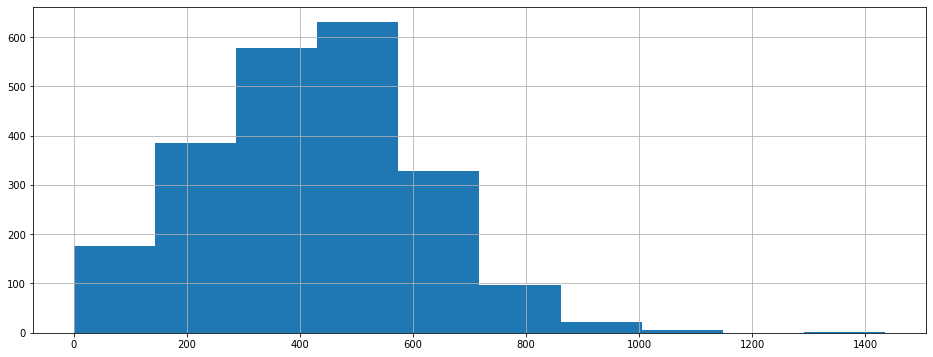

In [57]:

sum_smart['call_duration'].hist(figsize=(16,6))
plt.show

На гистограмме видим, что в больше всего тратится от 410-590 минут на разговоры в месяц.Больше 1000 минут на звонки никто не тратит.Некоторые пользователи значительно превышают лимит в 500 минут.

<function matplotlib.pyplot.show(close=None, block=None)>

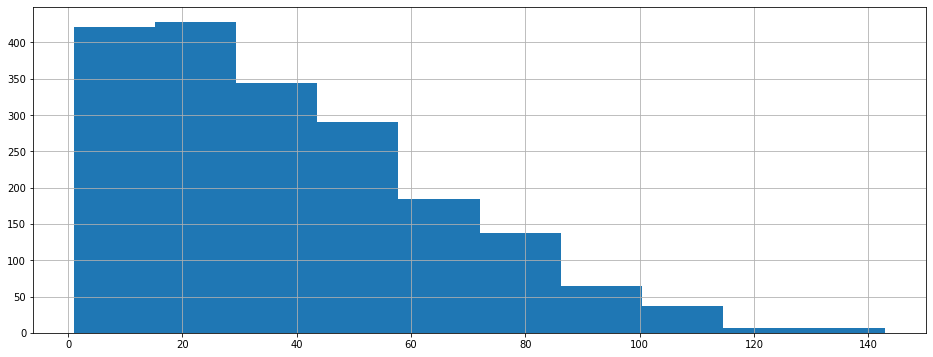

In [58]:
sum_smart['message_numbers'].hist(figsize=(16,6))
plt.show

По гистограмме видно, что много кто испльзует смс в среднем от 0-30 это пик больше 100 смс почти никто не отпровляет 

<function matplotlib.pyplot.show(close=None, block=None)>

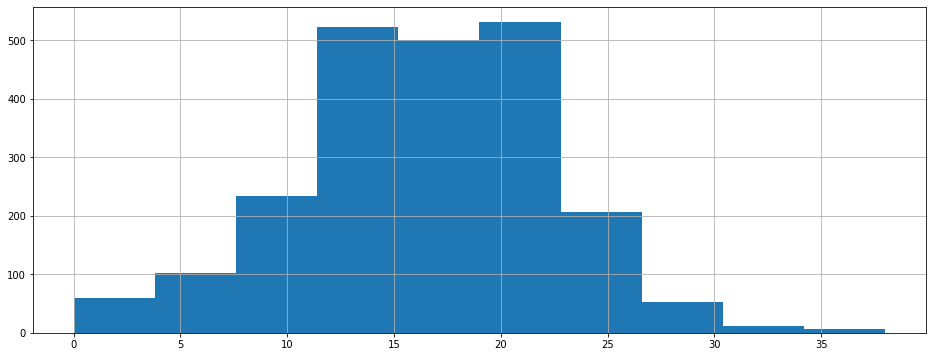

In [59]:
sum_smart['gb_used'].hist(figsize=(16,6))
plt.show

Интернетом пользуються активнее, совсем мало кто его не использует а пиковые значения на 20гб 

In [60]:
variance_smart_calls = np.var(sum_smart[['call_duration']], ddof=1)
variance_smart_messages = np.std(sum_smart[['message_numbers']], ddof=1)
variance_smart_internet = np.std(sum_smart[['gb_used']], ddof=1)
display(variance_smart_calls)
display(variance_smart_messages)
display(variance_smart_internet)


# посчитаем дисперсию по звонкам в тарифе 'smart', т.к имеем дело с выборкой указываем параметр ddof=1
# посчитаем дисперсию по сооббщениям в тарифе 'smart'
#посчитаем дисперсию по интернет-трафику в тарифе 'smart'

call_duration    35844.189551
dtype: float64

message_numbers    26.787949
dtype: float64

gb_used    5.749345
dtype: float64

Если будут коментарии, что по этим данным мы можем понять, буду очень благодарен)

In [61]:
sum_ultra = total_data.query('tariff == "ultra"')
display(sum_ultra)

,user_id,month,call_numbers,call_duration,message_numbers,gb_used,age,churn_date,city,first_name,...,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_cost
0,1000,2018-05-01,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,2018-06-01,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,2018-07-01,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,2018-08-01,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,2018-09-01,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1473,2018-09-01,NaN,NaN,19.0,17.0,18,NaT,Красноярск,Николай,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
981,1473,2018-10-01,NaN,NaN,20.0,14.0,18,NaT,Красноярск,Николай,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
982,1473,2018-11-01,NaN,NaN,14.0,22.0,18,NaT,Красноярск,Николай,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
983,1473,2018-12-01,NaN,NaN,20.0,18.0,18,NaT,Красноярск,Николай,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0


Срез по тарифу ультра

In [62]:
sum_ultra['total_cost'].sort_values().unique()

array([1950., 2100., 2250., 2400., 2550., 2700., 2850., 3000., 3150.,
       3300., 3450., 3600., 3750., 3900., 4050., 4200., 4650., 4800.])

Проверим работу функции подсчета

In [63]:
sum_ultra['user_id'].sort_values().unique()

array([1000, 1003, 1004, 1013, 1016, 1018, 1019, 1021, 1024, 1028, 1039,
       1048, 1049, 1050, 1053, 1057, 1060, 1063, 1078, 1080, 1081, 1084,
       1085, 1089, 1090, 1091, 1094, 1096, 1097, 1099, 1104, 1106, 1120,
       1122, 1124, 1126, 1143, 1148, 1150, 1151, 1152, 1156, 1165, 1166,
       1167, 1168, 1180, 1182, 1185, 1192, 1196, 1200, 1201, 1203, 1208,
       1222, 1225, 1226, 1231, 1234, 1240, 1243, 1245, 1253, 1254, 1255,
       1257, 1259, 1265, 1270, 1271, 1272, 1273, 1276, 1277, 1281, 1289,
       1292, 1294, 1300, 1303, 1304, 1309, 1310, 1318, 1325, 1328, 1330,
       1331, 1333, 1335, 1336, 1341, 1343, 1344, 1346, 1347, 1348, 1349,
       1350, 1352, 1356, 1360, 1361, 1363, 1364, 1367, 1369, 1375, 1377,
       1379, 1380, 1381, 1382, 1385, 1391, 1392, 1396, 1397, 1399, 1402,
       1403, 1405, 1412, 1415, 1416, 1424, 1430, 1436, 1440, 1442, 1452,
       1453, 1455, 1458, 1461, 1463, 1466, 1467, 1469, 1471, 1473, 1474,
       1476, 1485, 1491, 1493, 1495])

In [64]:
sum_ultra.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,985.0,1263.094416,140.694908,1000.0,1143.0,1277.0,1381.0,1495.0
call_numbers,951.0,76.016824,42.403348,1.0,43.0,75.0,105.0,244.0
call_duration,951.0,545.451104,306.925754,0.0,310.0,528.0,756.5,1673.0
message_numbers,795.0,61.161006,45.931026,1.0,24.0,51.0,87.5,224.0
gb_used,975.0,19.726154,9.714924,0.0,12.0,19.0,27.0,49.0
age,985.0,46.834518,17.107979,18.0,30.0,45.0,63.0,75.0
tariff_id,985.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
messages_included,985.0,1000.000000,0.000000,1000.0,1000.0,1000.0,1000.0,1000.0
mb_per_month_included,985.0,30720.000000,0.000000,30720.0,30720.0,30720.0,30720.0,30720.0
minutes_included,985.0,3000.000000,0.000000,3000.0,3000.0,3000.0,3000.0,3000.0


На тарифе ультра
Минут в среднем - 545
Смс - 61
Гб - 20
Стандартное отклонение в колонке с выручкой - 378.8, а среднее значение - 2070.

<function matplotlib.pyplot.show(close=None, block=None)>

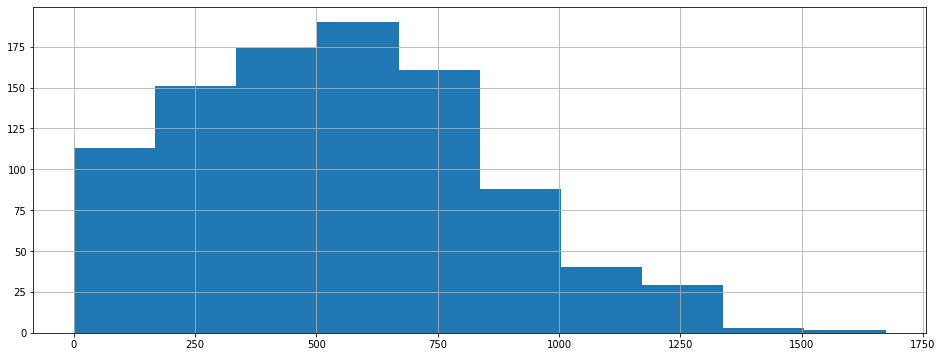

In [65]:
sum_ultra['call_duration'].hist(figsize=(16,6))
plt.show

Видим пик от 500-600, за лимит не выходит никто, редкто кто тратит более 1300 минут 

<function matplotlib.pyplot.show(close=None, block=None)>

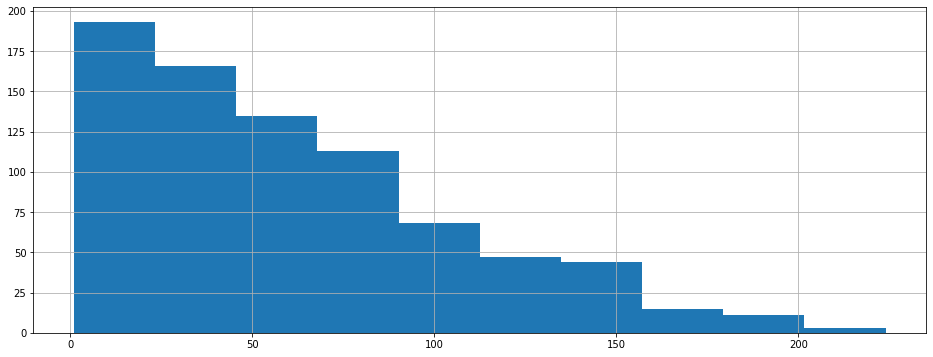

In [66]:
sum_ultra['message_numbers'].hist(figsize=(16,6))
plt.show

На тарифе ултра пик по смс в районе 25 более 150 мало кто использует

Кстати как добавить больше делений что снизу на график?)

<function matplotlib.pyplot.show(close=None, block=None)>

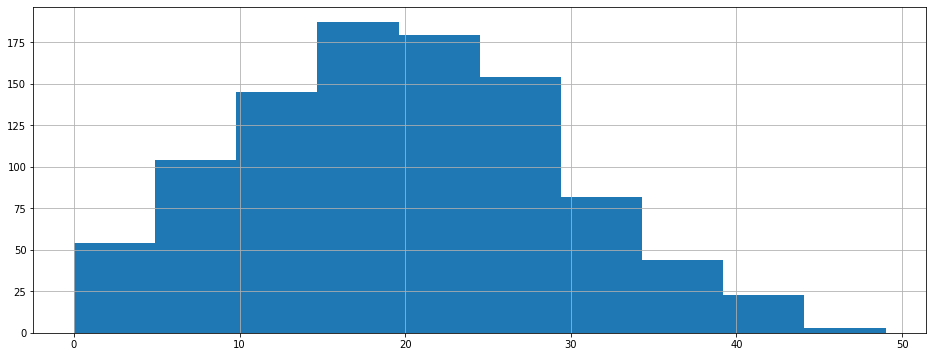

In [67]:
sum_ultra['gb_used'].hist(figsize=(16,6))
plt.show

Пик по интернету в районе 20 гб более 40 почти не используют мало кто выходит за рамки тарифа 

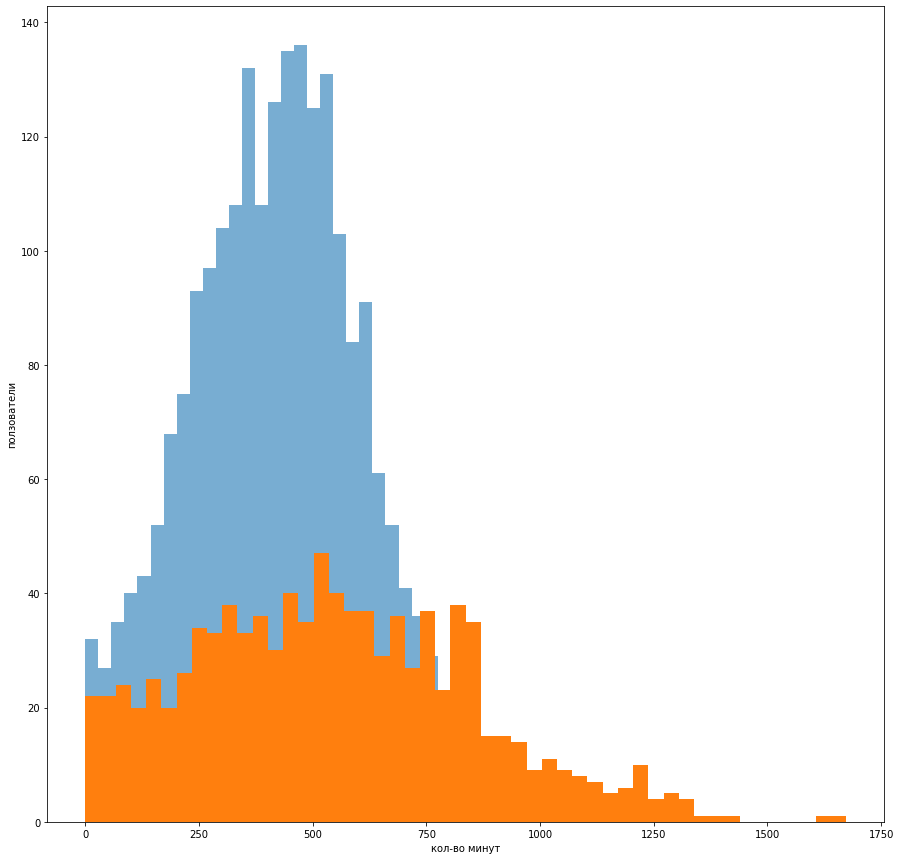

In [68]:

plt.figure(figsize=(15,15))
total_data['call_duration'][total_data['tariff'] == 'smart'].plot(kind='hist',bins=50,alpha = 0.6)
total_data['call_duration'][total_data['tariff'] == 'ultra'].plot(kind='hist',bins=50)

plt.xlabel("кол-во минут")
plt.ylabel('ползователи')

plt.show()

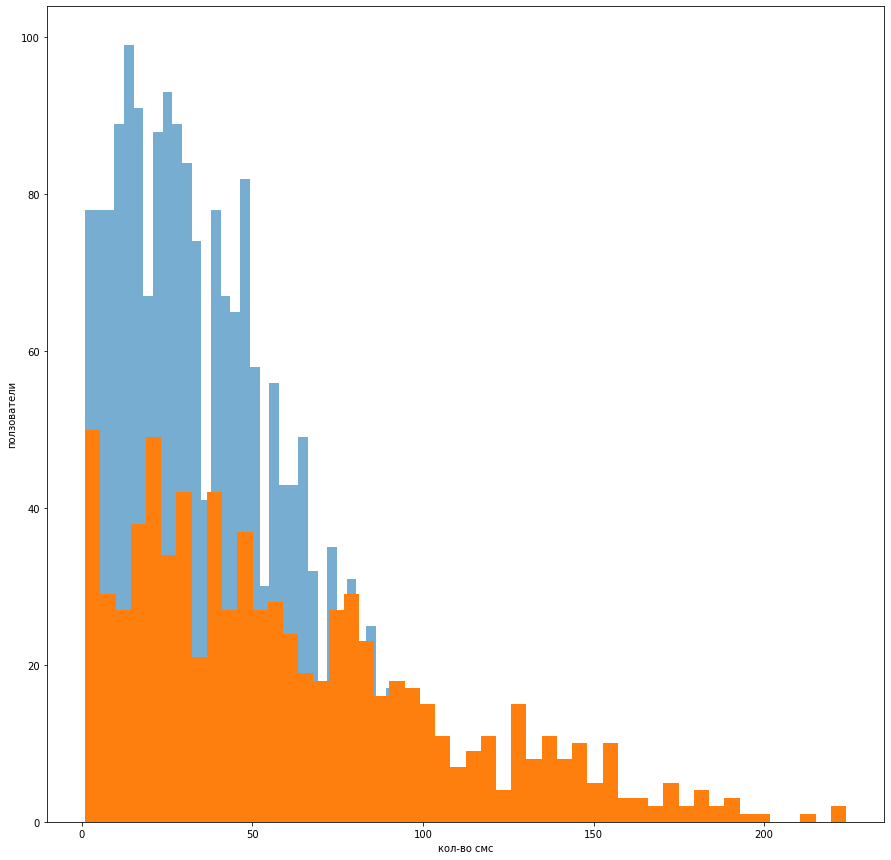

In [69]:

plt.figure(figsize=(15,15))
total_data['message_numbers'][total_data['tariff'] == 'smart'].plot(kind='hist',bins=50,alpha = 0.6)
total_data['message_numbers'][total_data['tariff'] == 'ultra'].plot(kind='hist',bins=50)
plt.xlabel("кол-во смс")
plt.ylabel('ползователи')

plt.show()

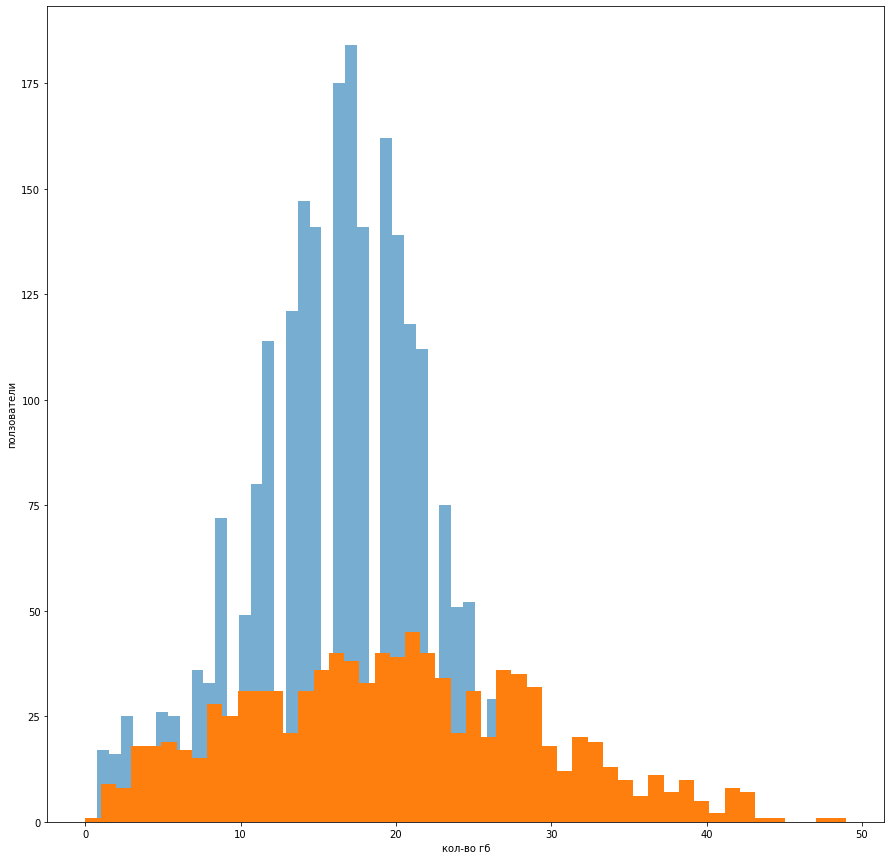

In [70]:
plt.figure(figsize=(15,15))
total_data['gb_used'][total_data['tariff'] == 'smart'].plot(kind='hist',bins=50,alpha = 0.6)
total_data['gb_used'][total_data['tariff'] == 'ultra'].plot(kind='hist',bins=50)
plt.xlabel("кол-во гб")
plt.ylabel('ползователи')

plt.show()

Попробывал сделать графики по кажому параметру хочу совет, как их сделать более читаемыми ) 

In [71]:
variance_smart_calls = np.var(sum_ultra[['call_duration']], ddof=1)
variance_smart_messages = np.std(sum_ultra[['message_numbers']], ddof=1)
variance_smart_internet = np.std(sum_ultra[['gb_used']], ddof=1)
display(variance_smart_calls)
display(variance_smart_messages)
display(variance_smart_internet)
# посчитаем дисперсию по звонкам в тарифе 'ultra'
# посчитаем дисперсию по сообщениям в тарифе 'ultra'
#посчитаем дисперсию по интернету в тарифе 'ultra'

call_duration    94203.418396
dtype: float64

message_numbers    45.931026
dtype: float64

gb_used    9.714924
dtype: float64

Согласно числовым данным пользователям тарифа 'smart' требуется в среднем 419 минут разговора в месяц, 38-39 - сообщений и 17 - гб интернета .
Пользователям тарифа ultra требуется в среднем 545 минут разговора в месяц, 61-сообщение, 19 - гб интернета.
Пользователи тарифа smart используют немного меньшее количество минут в месяц, чем пользователи ultra.  
Большинство пользователей тарифа Смарт используют сообщения в рамках лимита - 50 - всё же есть те, кто значительно превышает лимит, тем самым принося выручку компании.Основная масса пользователей ultra использует около 61 сообщения, но лимита в 1000 сообщений не достигает никто.
Пользователи smart тарифа используют чуть меньшее количество минут звонков и сообщений в месяц, чем пользователи ultra. Лимита на звонки и минуты в ultra в среднем не достигает никто. При этом интернетом пользователи ultra и smart пользуются активно, перерасходуя лимиты.

## Проверим гипотезы

средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

In [72]:
alpha = .05

#зададим критический уровень статистической значимости

In [73]:
results = st.ttest_ind(
    sum_smart['total_cost'],
    sum_ultra['total_cost']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средняя выручка в месяц с пользователя тарифа smart -', sum_smart['total_cost'].mean().round(2))
print('Средняя выручка в месяц с пользователя тарифа ultra -', sum_ultra['total_cost'].mean().round(2))

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу

Средняя выручка в месяц с пользователя тарифа smart - 1294.64
Средняя выручка в месяц с пользователя тарифа ultra - 2071.07


Отвергаем нулевую гипотезу, мы видим, что средняя выручка тарифа ultra, больше в 1,6 раза.

2.Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую и альтернативную гипотезу:
H₀ - средняя выручка пользователей из Москвы и других регионов равна
H₁ - средняя выручка пользователей из Москвы и других регионов не равна

In [74]:
from_Moscow = total_data.query('city == "Москва"')
not_from_Moscow = total_data.query('city != "Москва"')
display(from_Moscow.head())
display(not_from_Moscow.head())

#сделаем срез данных по городу Москва, сохраним результат в переменной from_Moscow
#сделаем срез данных по другим городам, сохраним результат в переменной not_from_Moscow

,user_id,month,call_numbers,call_duration,message_numbers,gb_used,age,churn_date,city,first_name,...,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_cost
8,1003,2018-08-01,55.0,380.0,37.0,9.0,23,NaT,Москва,Белла,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
9,1003,2018-09-01,134.0,961.0,91.0,13.0,23,NaT,Москва,Белла,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
10,1003,2018-10-01,108.0,855.0,83.0,15.0,23,NaT,Москва,Белла,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
11,1003,2018-11-01,115.0,824.0,94.0,12.0,23,NaT,Москва,Белла,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
12,1003,2018-12-01,108.0,802.0,75.0,10.0,23,NaT,Москва,Белла,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0


,user_id,month,call_numbers,call_duration,message_numbers,gb_used,age,churn_date,city,first_name,...,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_cost
0,1000,2018-05-01,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,2018-06-01,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,2018-07-01,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,2018-08-01,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,2018-09-01,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,1,1000,30720,3000,1950,150,1,1,30.0,1950.0


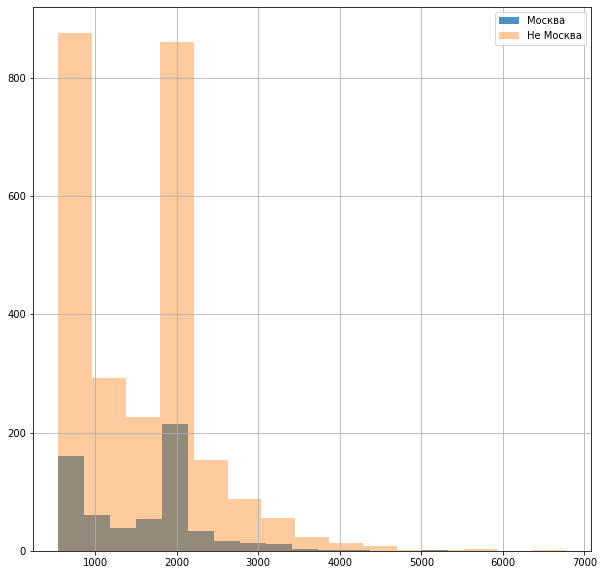

In [75]:
from_Moscow['total_cost'].hist(bins=15,alpha=0.8,label='Москва',figsize=(10,10))
not_from_Moscow['total_cost'].hist(bins=15,alpha=0.4,label='Не Москва',figsize=(10,10))
plt.legend()
plt.show()

Гистограмма выручки абонентов по регионам 

In [76]:
alpha = .05

#зададим критический уровень статистической значимости

In [77]:
results = st.ttest_ind(
    from_Moscow['total_cost'],
    not_from_Moscow['total_cost']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средняя выручка в месяц с пользователя из Москвы -', from_Moscow['total_cost'].mean().round(2))
print('Средняя выручка в месяц с пользователя из других городов -', not_from_Moscow['total_cost'].mean().round(2))

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу

Средняя выручка в месяц с пользователя из Москвы - 1550.81
Средняя выручка в месяц с пользователя из других городов - 1528.32


Не получилось огтвергнуть нулевую гипотезу, выручки почти равны

Мы проверили две гипотезы: первую, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна - отвергли. Вторую, что
средняя выручка пользователей из Москвы равна выручке пользователей из других регионов - отвергнуть не удалось.

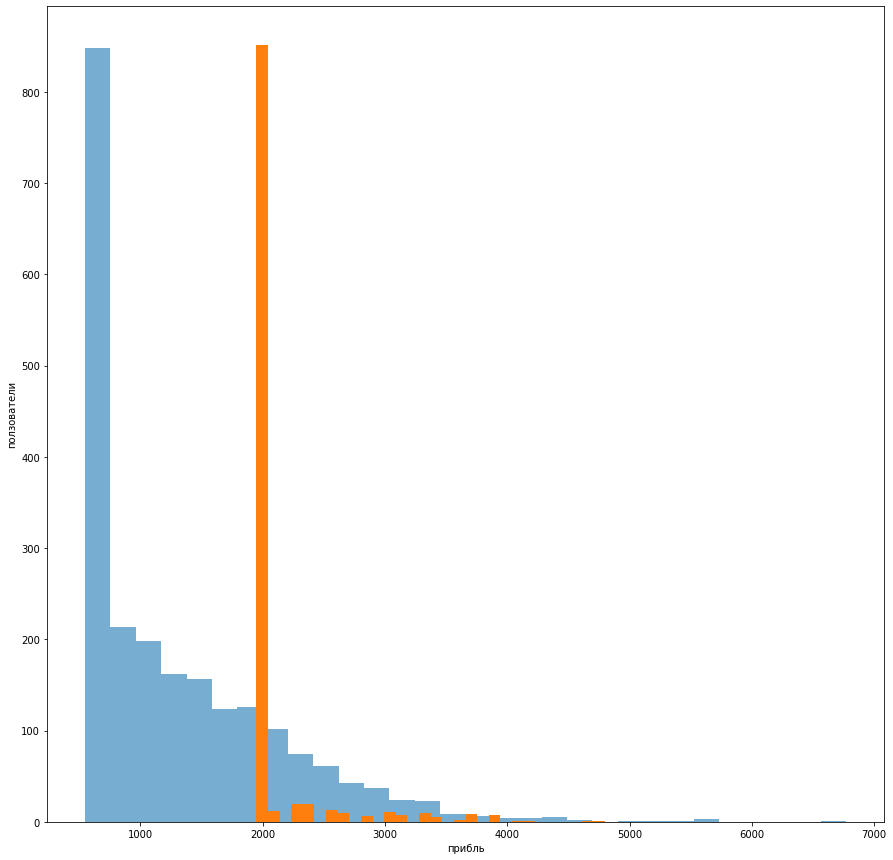

In [78]:
plt.figure(figsize=(15,15))
total_data['total_cost'][total_data['tariff'] == 'smart'].plot(kind='hist',bins=30,alpha = 0.6)
total_data['total_cost'][total_data['tariff'] == 'ultra'].plot(kind='hist',bins=30)
plt.xlabel("прибль")
plt.ylabel('ползователи')

plt.show()

## Общий вывод

В ходе работы произвели такую работу как:
1. Исправили ошибки в данных и привели в нужный формат 
2. Посчитали помесячную выручку с каждого пользователя
3. Пользователи smart тарифа используют чуть меньшее количество минут звонков и сообщений в месяц, чем пользователи ultra. Лимита на звонки и минуты в ultra в среднем не достигает никто. При этом интернетом пользователи ultra и smart пользуются активнее, перерасходуя лимиты.


Проверили 2 гипотезы:

Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна - отвергли.
Средняя выручка пользователей из Москвы равна выручке пользователей из других городов - отвергнуть не удалось
Тариф ultra приносит компании бОльшую выручку, в основном из-за того, что его пользователи перерасходуют лимит по звонкам и интернет-трафику.